In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [223]:
df = pd.read_csv('ev.csv')  
df.head()

,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually


In [225]:
print('Shape:',df.shape)
print('\n')
print(df.info())
print('\n')
print(df.isnull().sum())

Shape: (5000, 17)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station ID                   5000 non-null   object 
 1   Latitude                     5000 non-null   float64
 2   Longitude                    5000 non-null   float64
 3   Address                      5000 non-null   object 
 4   Charger Type                 5000 non-null   object 
 5   Cost (USD/kWh)               5000 non-null   float64
 6   Availability                 5000 non-null   object 
 7   Distance to City (km)        5000 non-null   float64
 8   Usage Stats (avg users/day)  5000 non-null   int64  
 9   Station Operator             5000 non-null   object 
 10  Charging Capacity (kW)       5000 non-null   int64  
 11  Connector Types              5000 non-null   object 
 12  Installation Year            5000 non-null   int64  
 13

In [227]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # Standardize column names
#Clean string columns
df['charger_type'] = df['charger_type'].str.strip().str.title()
df['availability'] = df['availability'].str.strip()
df['renewable_energy_source'] = df['renewable_energy_source'].str.strip()
df['maintenance_frequency'] = df['maintenance_frequency'].str.strip()

In [229]:
df

,station_id,latitude,longitude,address,charger_type,cost_(usd/kwh),availability,distance_to_city_(km),usage_stats_(avg_users/day),station_operator,charging_capacity_(kw),connector_types,installation_year,renewable_energy_source,reviews_(rating),parking_spots,maintenance_frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",Ac Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",Dc Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",Ac Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",Ac Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",Ac Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EVS04996,52.406921,13.441112,"614 Berlin Ave, Berlin",Dc Fast Charger,0.31,9:00-18:00,6.05,67,Ionity,50,CCS,2014,Yes,3.4,3,Monthly
4996,EVS04997,-23.503534,-46.535017,"5494 São Paulo Ave, São Paulo",Ac Level 1,0.22,24/7,16.92,68,Tesla,350,CCS,2010,Yes,4.6,10,Quarterly
4997,EVS04998,41.882499,-87.662551,"7567 Chicago Ave, Chicago",Dc Fast Charger,0.20,6:00-22:00,13.27,89,ChargePoint,150,CHAdeMO,2015,Yes,3.6,3,Monthly
4998,EVS04999,25.398405,55.295233,"8710 Dubai Ave, Dubai",Dc Fast Charger,0.19,9:00-18:00,4.03,44,ChargePoint,150,"CCS, CHAdeMO",2016,Yes,4.7,3,Quarterly


Avg. no. of users by Type of charger

In [232]:
df.groupby('charger_type')['usage_stats_(avg_users/day)'].mean().sort_values(ascending=False)

charger_type
Ac Level 1         55.895604
Ac Level 2         55.268707
Dc Fast Charger    55.205257
Name: usage_stats_(avg_users/day), dtype: float64

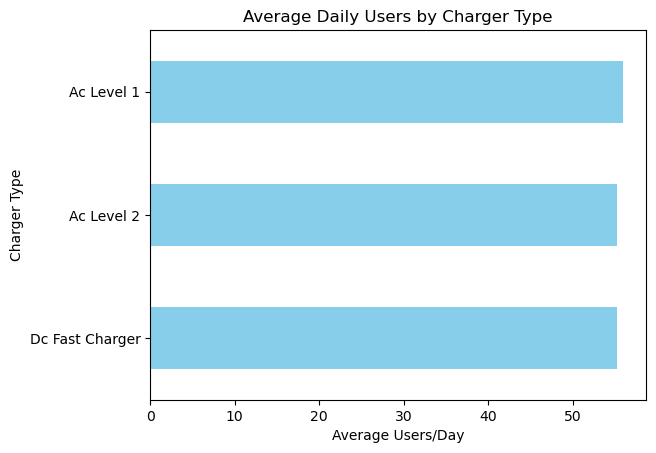

In [234]:
df.groupby('charger_type')['usage_stats_(avg_users/day)'].mean().sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Average Daily Users by Charger Type')
plt.xlabel('Average Users/Day')
plt.ylabel('Charger Type')
plt.show()

Top 10 EV Station Operators by Charging capacity

In [237]:
df.groupby('station_operator')['charging_capacity_(kw)'].sum().sort_values(ascending=False).head(10)

station_operator
ChargePoint    150892
Tesla          145438
EVgo           143612
Greenlots      143154
Ionity         138264
Name: charging_capacity_(kw), dtype: int64

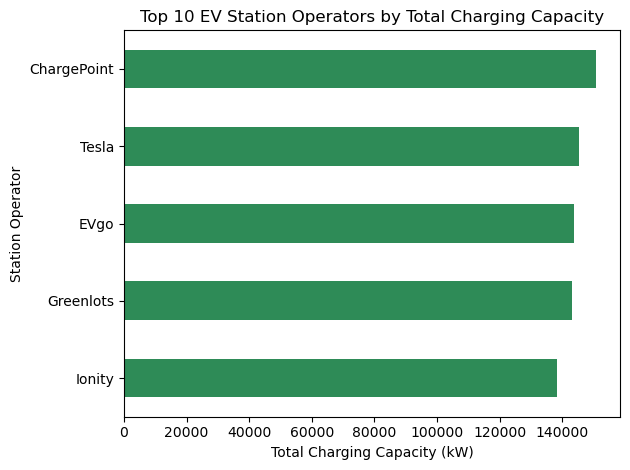

In [239]:
df.groupby('station_operator')['charging_capacity_(kw)'].sum().sort_values(ascending=False).head(10).plot(kind='barh', color='seagreen')
plt.title('Top 10 EV Station Operators by Total Charging Capacity')
plt.xlabel('Total Charging Capacity (kW)')
plt.ylabel('Station Operator')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Avg. cost by Type of charger

In [242]:
df.groupby('charger_type')['cost_(usd/kwh)'].mean().sort_values()

charger_type
Ac Level 2         0.298844
Ac Level 1         0.299890
Dc Fast Charger    0.302003
Name: cost_(usd/kwh), dtype: float64

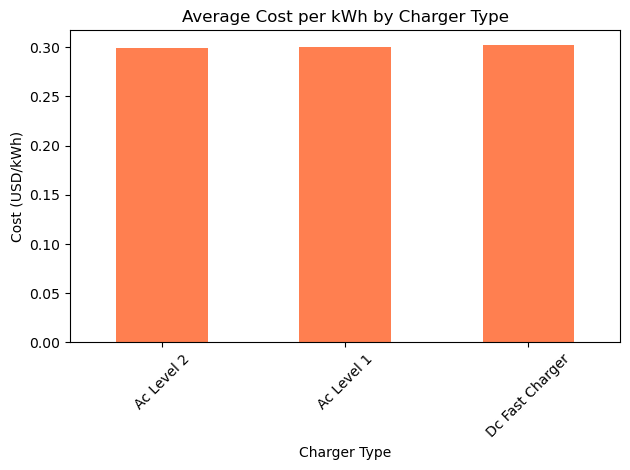

In [244]:
df.groupby('charger_type')['cost_(usd/kwh)'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Average Cost per kWh by Charger Type')
plt.ylabel('Cost (USD/kWh)')
plt.xlabel('Charger Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

No. of stations by Installation year

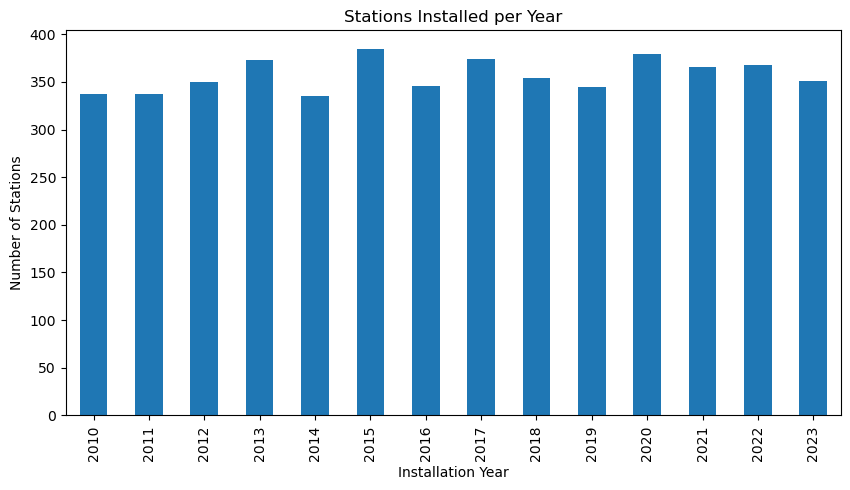

In [247]:
df.groupby('installation_year')['station_id'].count().plot(kind='bar', figsize=(10, 5), title='Stations Installed per Year')
plt.xlabel("Installation Year")
plt.ylabel("Number of Stations")
plt.show()

Avg. reviews by Maintenance

In [250]:
df.groupby('maintenance_frequency')['reviews_(rating)'].mean().sort_values(ascending=False)

maintenance_frequency
Quarterly    4.015188
Annually     3.985940
Monthly      3.983075
Name: reviews_(rating), dtype: float64

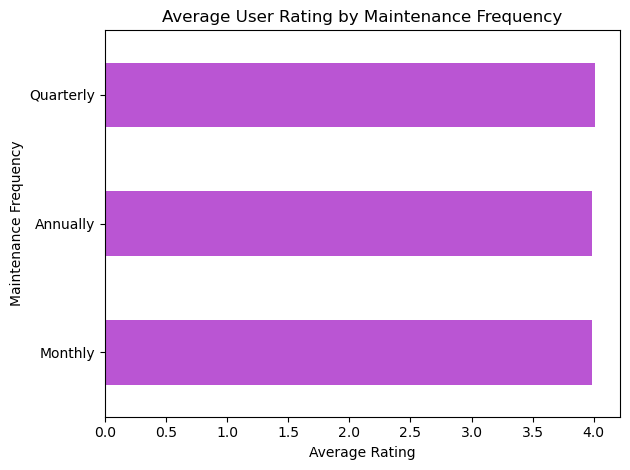

In [252]:
df.groupby('maintenance_frequency')['reviews_(rating)'].mean().sort_values(ascending=True).plot(kind='barh', color='mediumorchid')
plt.title('Average User Rating by Maintenance Frequency')
plt.xlabel('Average Rating')
plt.ylabel('Maintenance Frequency')
plt.tight_layout()
plt.show()

In [254]:
df.columns

Index(['station_id', 'latitude', 'longitude', 'address', 'charger_type',
       'cost_(usd/kwh)', 'availability', 'distance_to_city_(km)',
       'usage_stats_(avg_users/day)', 'station_operator',
       'charging_capacity_(kw)', 'connector_types', 'installation_year',
       'renewable_energy_source', 'reviews_(rating)', 'parking_spots',
       'maintenance_frequency'],
      dtype='object')

In [256]:
df['address']

0            4826 Random Rd, City 98, Country
1       8970 San Francisco Ave, San Francisco
2                   5974 Bangkok Ave, Bangkok
3                   6995 Toronto Ave, Toronto
4                     5704 Mumbai Ave, Mumbai
                        ...                  
4995                   614 Berlin Ave, Berlin
4996            5494 São Paulo Ave, São Paulo
4997                7567 Chicago Ave, Chicago
4998                    8710 Dubai Ave, Dubai
4999        1221 Los Angeles Ave, Los Angeles
Name: address, Length: 5000, dtype: object

In [258]:
df['city'] = df['address'].str.split(',').str[-1].str.strip()

In [260]:
df['city'].isnull().sum()

0

In [262]:
df

,station_id,latitude,longitude,address,charger_type,cost_(usd/kwh),availability,distance_to_city_(km),usage_stats_(avg_users/day),station_operator,charging_capacity_(kw),connector_types,installation_year,renewable_energy_source,reviews_(rating),parking_spots,maintenance_frequency,city
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",Ac Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually,Country
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",Dc Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly,San Francisco
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",Ac Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually,Bangkok
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",Ac Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly,Toronto
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",Ac Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually,Mumbai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,EVS04996,52.406921,13.441112,"614 Berlin Ave, Berlin",Dc Fast Charger,0.31,9:00-18:00,6.05,67,Ionity,50,CCS,2014,Yes,3.4,3,Monthly,Berlin
4996,EVS04997,-23.503534,-46.535017,"5494 São Paulo Ave, São Paulo",Ac Level 1,0.22,24/7,16.92,68,Tesla,350,CCS,2010,Yes,4.6,10,Quarterly,São Paulo
4997,EVS04998,41.882499,-87.662551,"7567 Chicago Ave, Chicago",Dc Fast Charger,0.20,6:00-22:00,13.27,89,ChargePoint,150,CHAdeMO,2015,Yes,3.6,3,Monthly,Chicago
4998,EVS04999,25.398405,55.295233,"8710 Dubai Ave, Dubai",Dc Fast Charger,0.19,9:00-18:00,4.03,44,ChargePoint,150,"CCS, CHAdeMO",2016,Yes,4.7,3,Quarterly,Dubai


Avg. Parking availaibilty by City

In [265]:
df.groupby('city')['parking_spots'].mean().sort_values(ascending=False).head(10)

city
Cape Town        5.757962
San Francisco    5.700617
Seoul            5.688963
Bangkok          5.617834
Country          5.608000
Chicago          5.590909
Los Angeles      5.566434
Dubai            5.540541
Toronto          5.536965
Mexico City      5.501558
Name: parking_spots, dtype: float64

Station operators with most stations

In [268]:
df['station_operator'].value_counts().head(5)

station_operator
Tesla          1029
ChargePoint    1004
EVgo           1002
Greenlots       987
Ionity          978
Name: count, dtype: int64

Total Usage by Connector Types

In [271]:
df_exp = df.assign(connector_types=df['connector_types'].str.split(',')).explode('connector_types')
df_exp['connector_types'] = df_exp['connector_types'].str.strip()
df_exp.groupby('connector_types')['usage_stats_(avg_users/day)'].sum().sort_values(ascending=False)

connector_types
Type 2     107158
CCS        104459
CHAdeMO    100710
Tesla      100585
Name: usage_stats_(avg_users/day), dtype: int64

Geographical Distribution of EV Charging Stations

In [274]:
import plotly.express as px

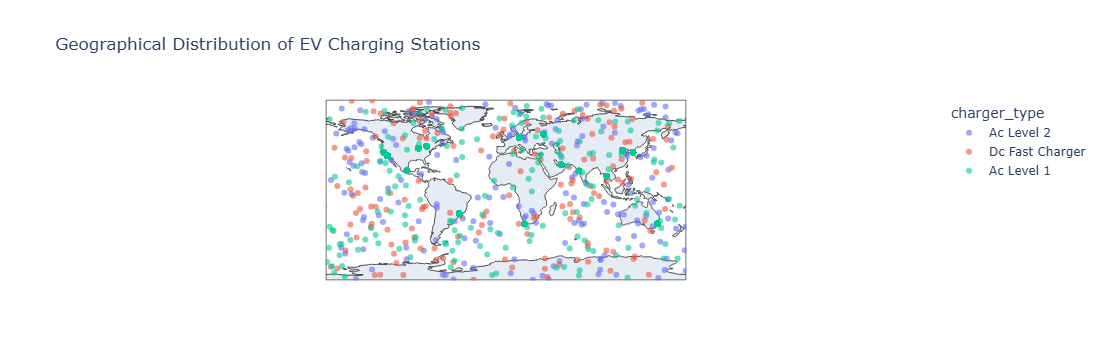

In [276]:
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     hover_name='station_id',
                     color='charger_type',
                     title='Geographical Distribution of EV Charging Stations',
                     opacity=0.6)
fig.show()

Station Density Heatmap

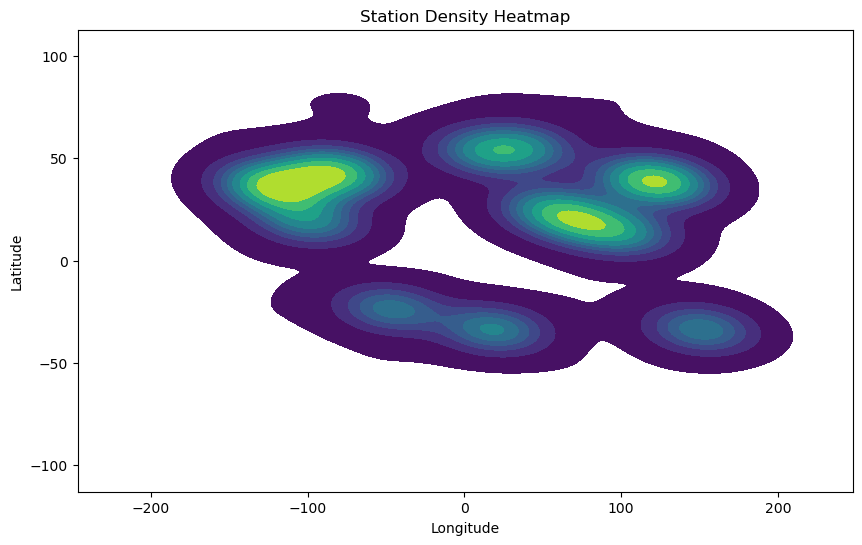

In [278]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['longitude'], y=df['latitude'], cmap='viridis', fill=True)
plt.title('Station Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Charger Type Popularity

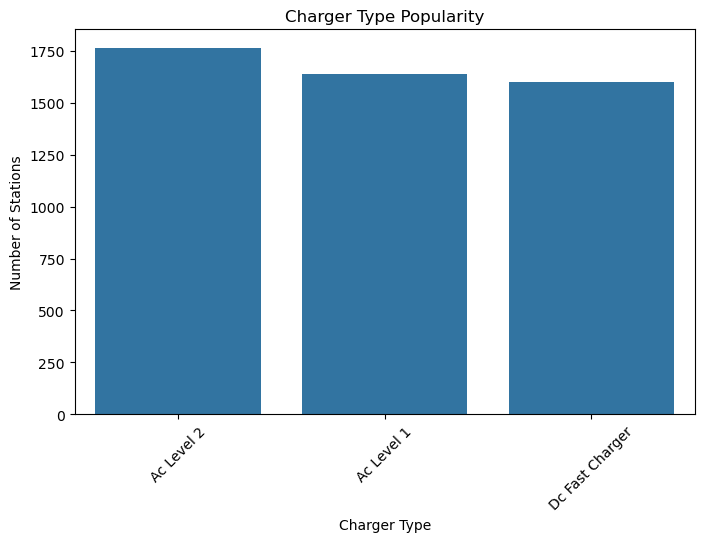

In [281]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='charger_type', order=df['charger_type'].value_counts().index)
plt.title("Charger Type Popularity")
plt.xlabel("Charger Type")
plt.ylabel("Number of Stations")
plt.xticks(rotation=45)
plt.show()

High-Demand Areas (Usage Stats)

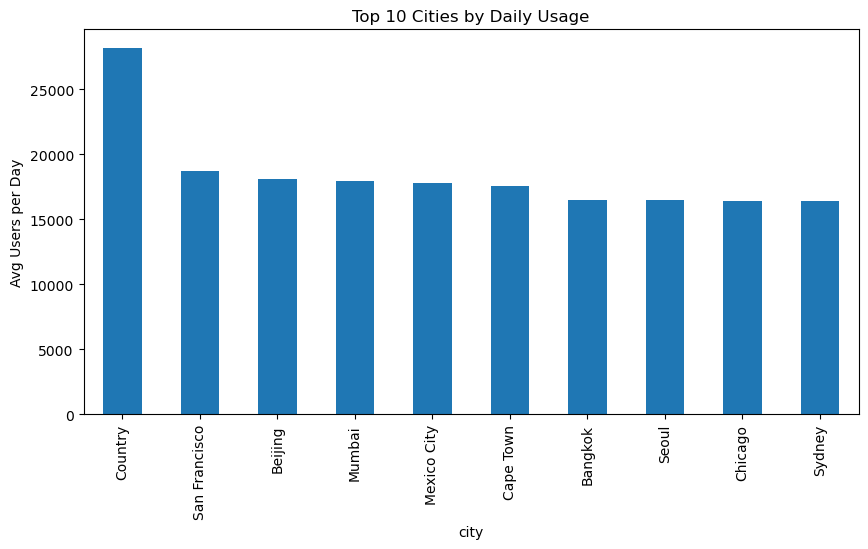

In [283]:
top_cities = df.groupby('city')['usage_stats_(avg_users/day)'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='bar', figsize=(10,5), title="Top 10 Cities by Daily Usage")
plt.ylabel("Avg Users per Day")
plt.show()

Map of High Usage Stations

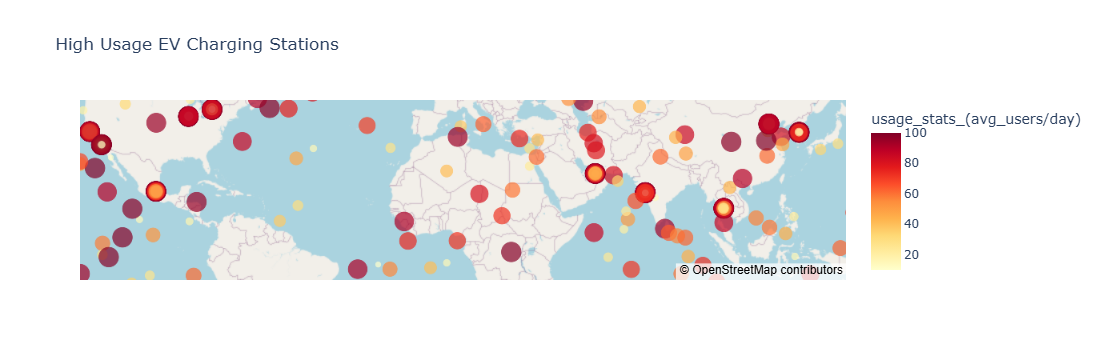

In [285]:
fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        color="usage_stats_(avg_users/day)",
                        size="usage_stats_(avg_users/day)",
                        color_continuous_scale="YlOrRd",
                        size_max=15,
                        zoom=1,
                        mapbox_style="open-street-map",
                        title="High Usage EV Charging Stations")
fig.show()

Charging Cost vs Usage

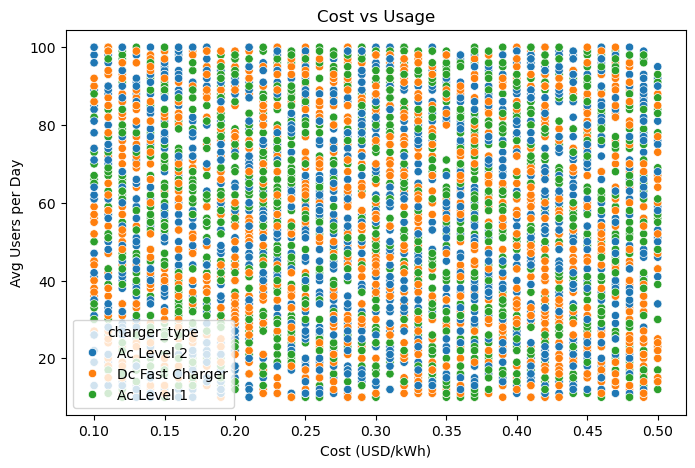

In [290]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='cost_(usd/kwh)', y='usage_stats_(avg_users/day)', hue='charger_type')
plt.title("Cost vs Usage")
plt.xlabel("Cost (USD/kWh)")
plt.ylabel("Avg Users per Day")
plt.show()

Insights:
- Majority of stations are AC Level 2.
- High usage detected in major cities such as Country,San Francisco,Beijing, and Mumbai.
- Renewable energy is used in ~60% of stations.
- Peak usage correlates with low cost and central locations.